**Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import os
import torch
import torchaudio
import seaborn as sns
import speech_recognition as sr
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from pydub import AudioSegment
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import warnings
warnings.filterwarnings('ignore')


**Load the Dataset**

In [215]:
paths = []
labels = []
for dirname, _, filnames in os.walk('E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data'):
    for filename in filnames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [216]:
paths[:5]

['E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [217]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [218]:
#Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,E:/InternshipWork/SpeechDetectionSystemsProjec...,angry
1,E:/InternshipWork/SpeechDetectionSystemsProjec...,angry
2,E:/InternshipWork/SpeechDetectionSystemsProjec...,angry
3,E:/InternshipWork/SpeechDetectionSystemsProjec...,angry
4,E:/InternshipWork/SpeechDetectionSystemsProjec...,angry


In [219]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

**Explotary Data Analysis**

<Axes: xlabel='count', ylabel='label'>

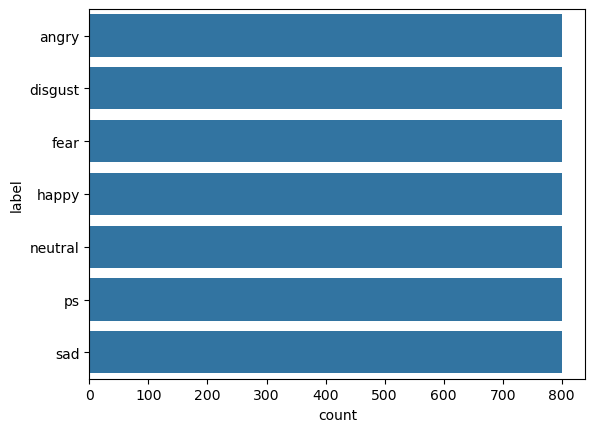

In [220]:
sns.countplot(df['label'])

In [221]:
# Function to convert audio to proper format (16-bit WAV)
import soundfile as sf
# Load pre-trained Wav2Vec2 model (English)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    librosa.display.specshow(xdb, sr=sr, x_axis="time", y_axis="log")
    #plt.title(emotion, size=20)
    #librosa.display.waveshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title(f"Spectrogram - {emotion}")
    plt.show()


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav


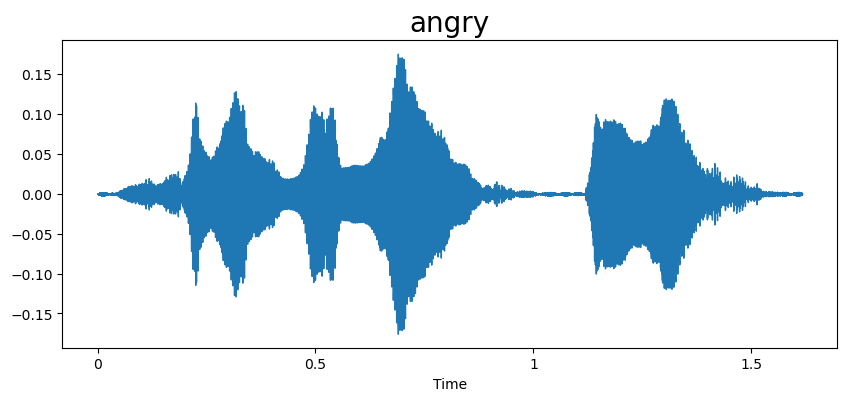

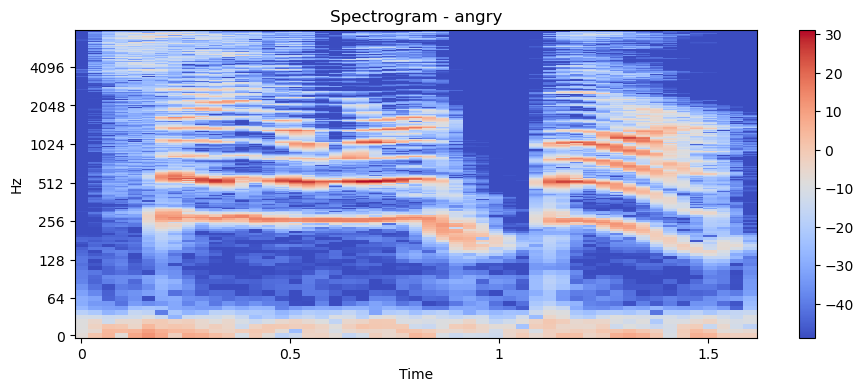

Playing Audio:


Decoded Text: SAY THE WORD BAR


In [232]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'angry'
path = str(np.array(df['speech'][df['label'] == emotion])[1])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

In [75]:
emotion = 'fear'
path = df['speech'][df['label']==emotion][400]
#data, sampling_rate = librosa.load(path)
#waveplot(data, sampling_rate, emotion)
#spectogram(data, sampling_rate, emotion)
path
#Audio(path)

'E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\\OAF_Fear\\OAF_back_fear.wav'

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_disgust\OAF_youth_disgust.wav


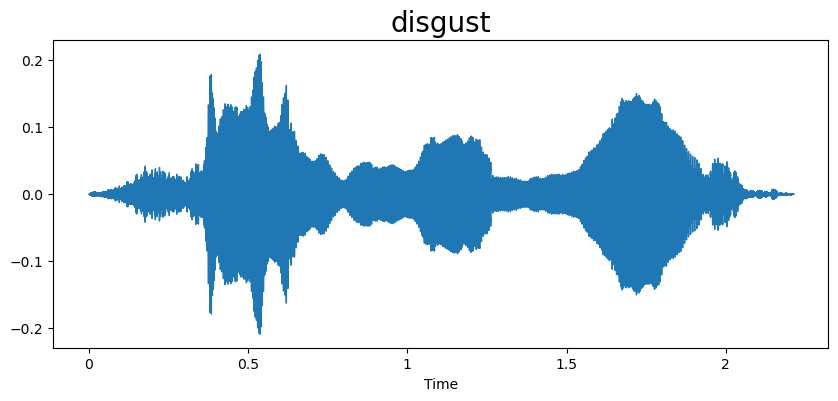

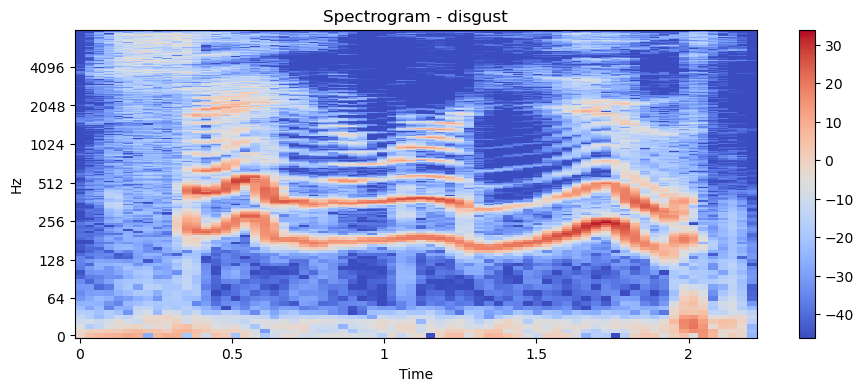

Playing Audio:


Decoded Text: SAY THE WORD YOUTH


In [234]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'disgust'
path = str(np.array(df['speech'][df['label'] == emotion])[199])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_Fear\OAF_chat_fear.wav


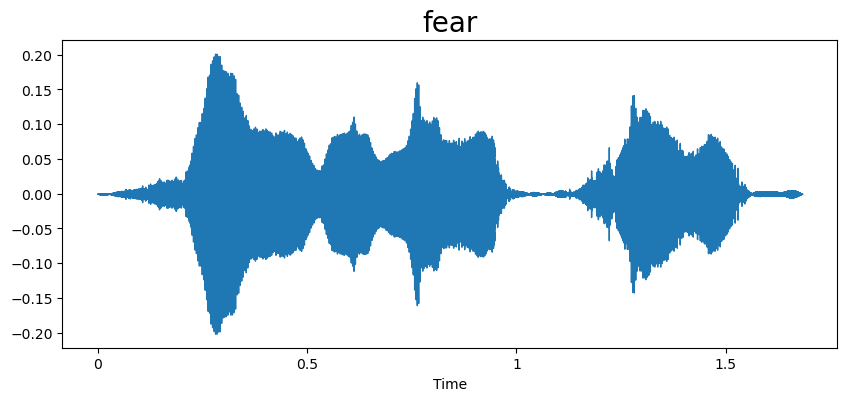

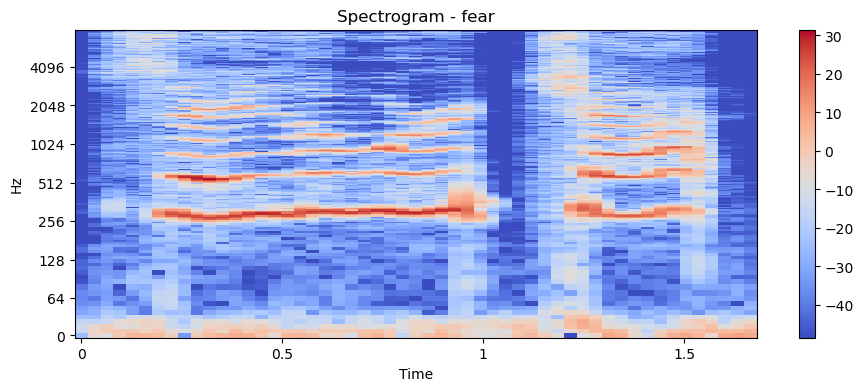

Playing Audio:


Decoded Text: SAY THE WORD CHAT


In [236]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'fear'
path = str(np.array(df['speech'][df['label'] == emotion])[19])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_neutral\OAF_bath_neutral.wav


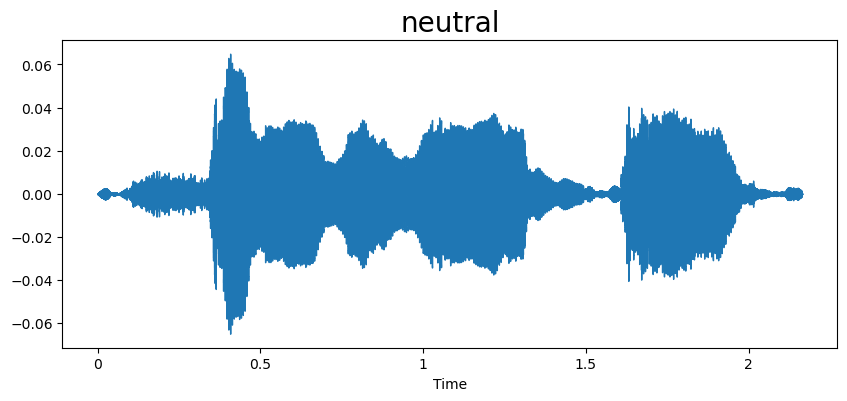

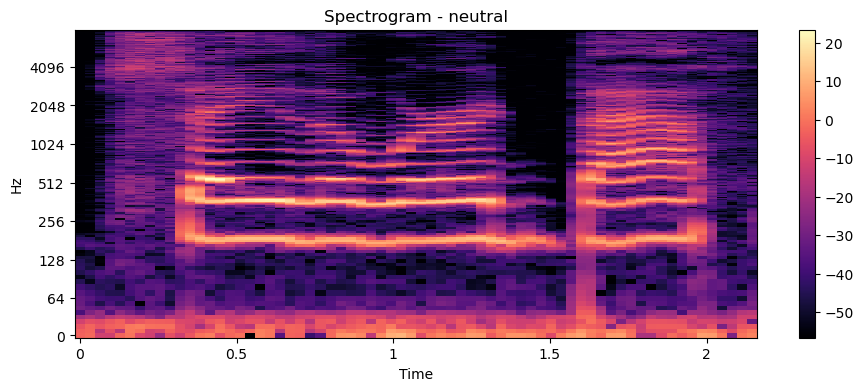

Playing Audio:


Decoded Text: SAY THE WORD BATH


In [242]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'neutral'
path = str(np.array(df['speech'][df['label'] == emotion])[3])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_Sad\OAF_bar_sad.wav


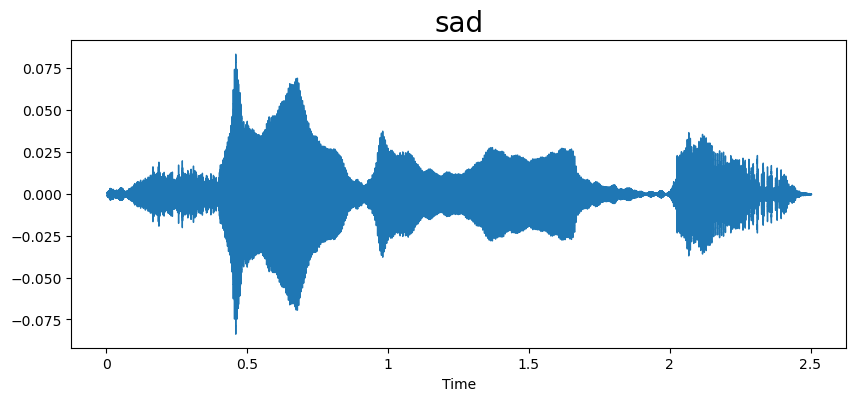

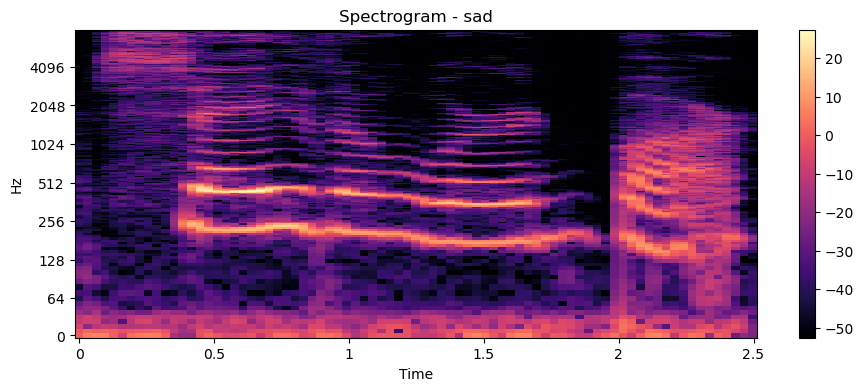

Playing Audio:


Decoded Text: SAVE THE WORD BAR


In [243]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'sad'
path = str(np.array(df['speech'][df['label'] == emotion])[1])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_Pleasant_surprise\OAF_base_ps.wav


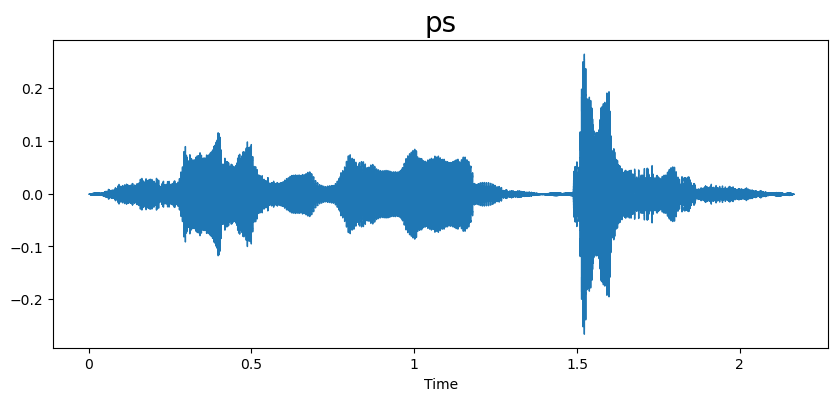

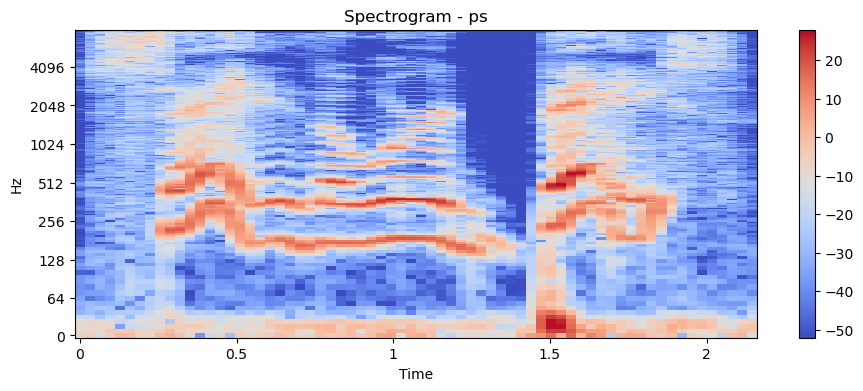

Playing Audio:


Decoded Text: SAY THE WORD BASE


In [244]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'ps'
path = str(np.array(df['speech'][df['label'] == emotion])[2])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

Audio Path: E:/InternshipWork/SpeechDetectionSystemsProject/Dataset/TESS Toronto emotional speech set data\OAF_happy\OAF_base_happy.wav


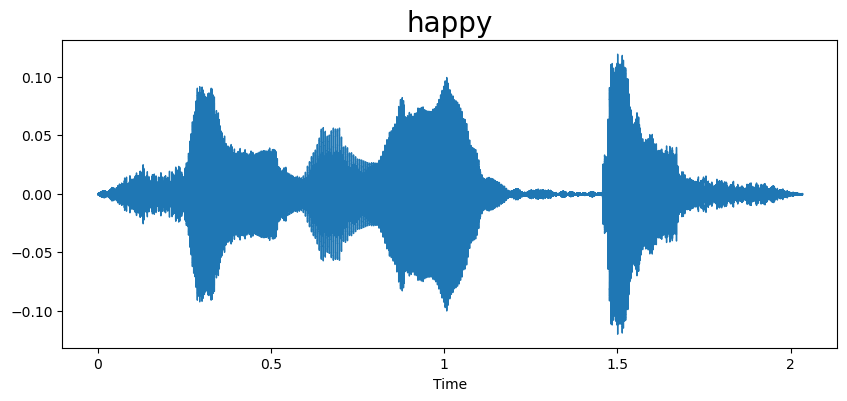

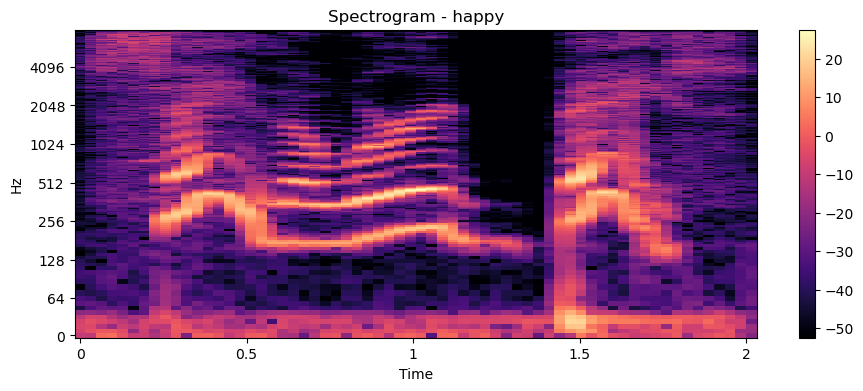

Playing Audio:


Decoded Text: SAY THE WORD BASE


In [245]:
# Function to convert speech to text using Wav2Vec2
def speech_to_text(audio_path):
    # Load and resample audio
    speech, sr = torchaudio.load(audio_path)
    resampler = torchaudio.transforms.Resample(sr, 16000)
    speech = resampler(speech).squeeze()

    # Normalize audio
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values

    # Run through Wav2Vec2 model
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predictions
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    print(f"Decoded Text: {transcription}")
    return transcription

# Emotion and file selection
emotion = 'happy'
path = str(np.array(df['speech'][df['label'] == emotion])[2])  # Convert to string

data, sampling_rate = librosa.load(path, sr=16000)

#Display Audio Path
print(f"Audio Path: {path}")

#Visualize
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio
print("Playing Audio:")
display(Audio(path))

# Speech-to-Text (Offline, Wav2Vec2)
decoded_text = speech_to_text(path)

**Feature Extraction**

In [246]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [247]:
extract_mfcc(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736607e-01, -1.8325531e+00,  2.0210162e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365835e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099635e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139229e+00,  2.0891502e+00, -1.9064913e+00],
      dtype=float32)

In [248]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [249]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600866, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550478, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [250]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape


(5600, 40)

In [251]:
#input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [252]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [253]:
y = y.toarray()

In [254]:
y.shape

(5600, 7)

**Create the LSTM Model**

In [255]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [256]:
#Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.1930 - loss: 1.9414 - val_accuracy: 0.2393 - val_loss: 1.7915
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3937 - loss: 1.6385 - val_accuracy: 0.3375 - val_loss: 1.5940
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4954 - loss: 1.4006 - val_accuracy: 0.5232 - val_loss: 1.1846
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5714 - loss: 1.1140 - val_accuracy: 0.6027 - val_loss: 0.9074
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6313 - loss: 0.9485 - val_accuracy: 0.7071 - val_loss: 0.6912
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6922 - loss: 0.7897 - val_accuracy: 0.7134 - val_loss: 0.5418
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7498 - loss: 0.6633 - val_accuracy: 0.7643 - val_loss: 0.4283
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8026 - loss: 0.5421 - val_accuracy: 0.8321 - val_loss

**Plot the results**

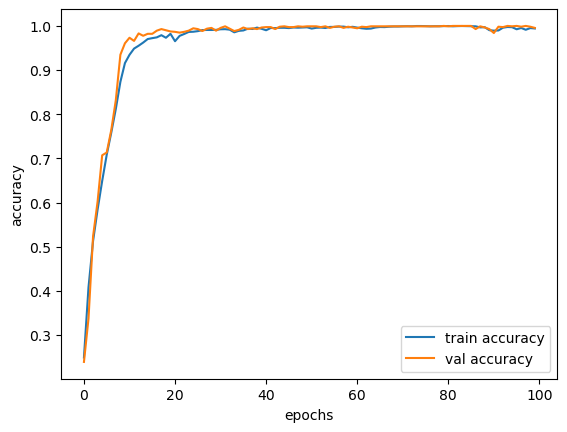

In [257]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

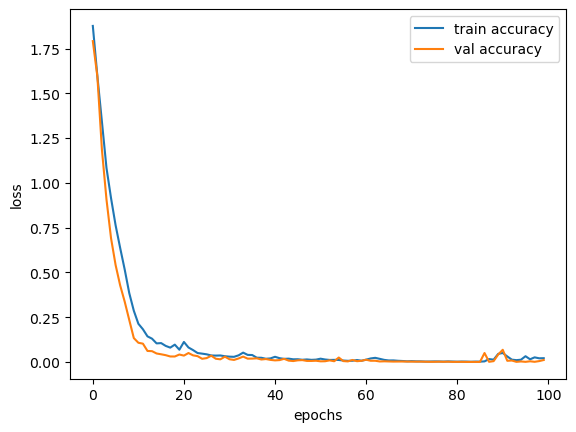

In [258]:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train accuracy')
plt.plot(epochs, val_loss, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()